Dataset reading

In [1]:
import pandas as pd
file_path="/content/mental_health_digital_behavior_data.csv"
df=pd.read_csv(file_path)
print(df.head())

   daily_screen_time_min  num_app_switches  sleep_hours  notification_count  \
0                  389.8                53          5.9                  89   
1                  351.7                52          7.2                  79   
2                  398.9                39          8.0                 108   
3                  451.4                44          6.5                  78   
4                  346.0                43          6.9                  35   

   social_media_time_min  focus_score  mood_score  anxiety_level  \
0                  133.2          6.8         8.9           10.0   
1                  109.5          5.5         9.4           10.0   
2                   84.7          6.7         9.4            9.4   
3                   88.9          6.0         9.4            5.1   
4                   78.8          8.2         9.4            8.0   

   digital_wellbeing_score  
0                     44.8  
1                     43.6  
2                     52.6  


Dataset evaluation

In [2]:
print(df.shape)

(500, 9)


In [3]:
print(df.columns)

Index(['daily_screen_time_min', 'num_app_switches', 'sleep_hours',
       'notification_count', 'social_media_time_min', 'focus_score',
       'mood_score', 'anxiety_level', 'digital_wellbeing_score'],
      dtype='object')


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   daily_screen_time_min    500 non-null    float64
 1   num_app_switches         500 non-null    int64  
 2   sleep_hours              500 non-null    float64
 3   notification_count       500 non-null    int64  
 4   social_media_time_min    500 non-null    float64
 5   focus_score              500 non-null    float64
 6   mood_score               500 non-null    float64
 7   anxiety_level            500 non-null    float64
 8   digital_wellbeing_score  500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB
None


In [5]:
print(df.describe())

       daily_screen_time_min  num_app_switches  sleep_hours  \
count             500.000000        500.000000   500.000000   
mean              360.437800         49.840000     6.557400   
std                58.782476          7.340993     1.192043   
min               180.000000         30.000000     3.000000   
25%               317.975000         44.000000     5.800000   
50%               360.800000         50.000000     6.500000   
75%               398.175000         55.000000     7.325000   
max               591.200000         72.000000    10.000000   

       notification_count  social_media_time_min  focus_score  mood_score  \
count           500.00000             500.000000   500.000000  500.000000   
mean             79.51200             121.771800     6.998000    8.988600   
std              23.97974              43.809443     0.618742    0.519104   
min              20.00000              30.000000     5.500000    7.400000   
25%              63.00000              91.87500

Taking target variable and features

In [6]:
X = df.drop(['digital_wellbeing_score'], axis=1)
y=df['digital_wellbeing_score']

Scatter plot

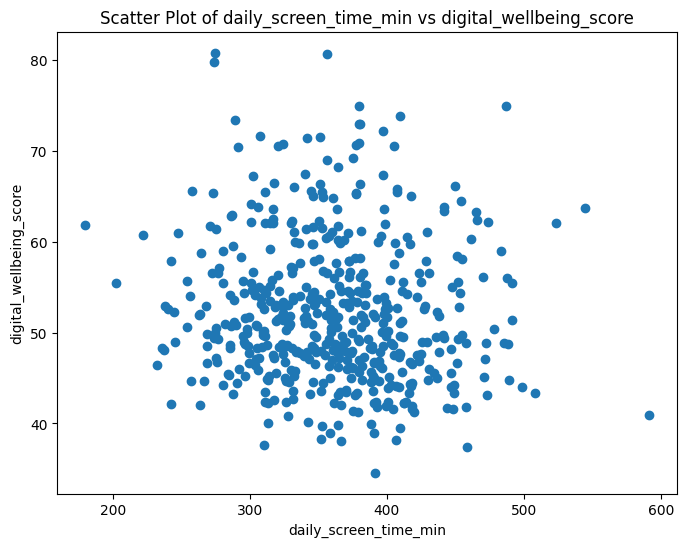

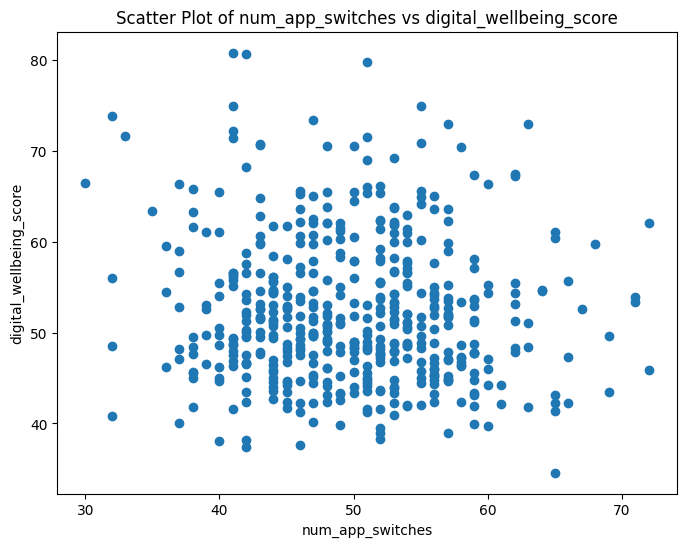

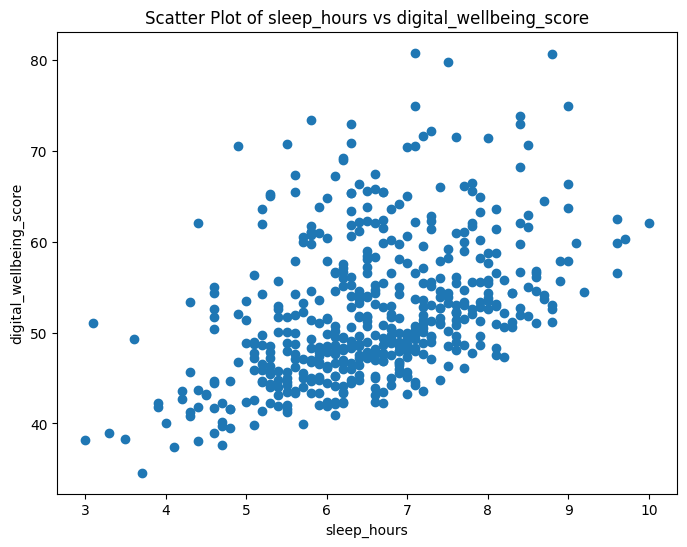

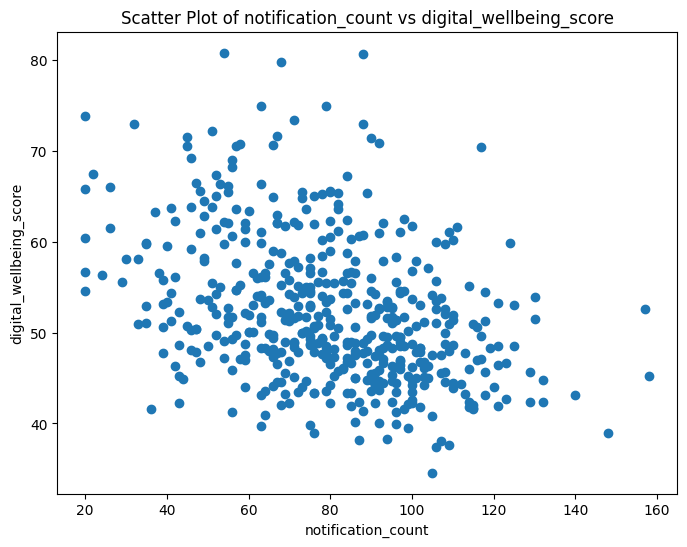

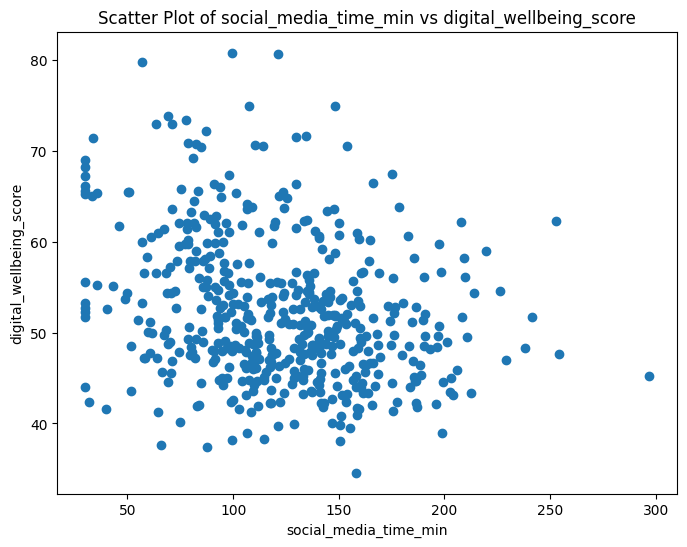

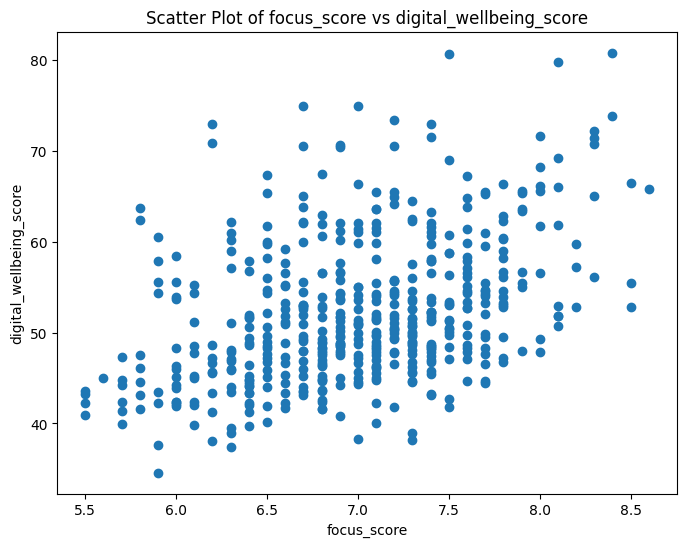

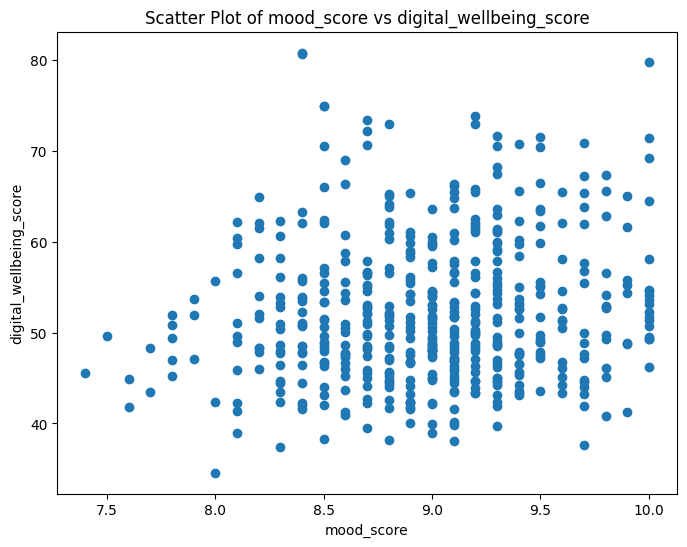

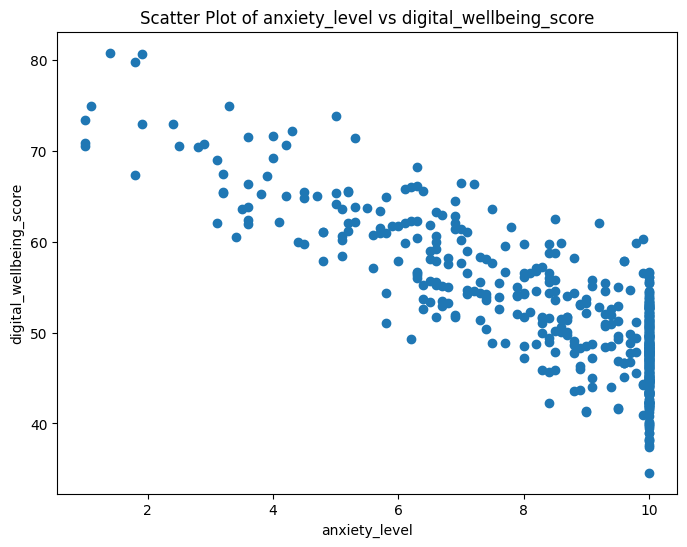

In [7]:
import matplotlib.pyplot as plt
for col in X.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(X[col], y)
    plt.xlabel(col)
    plt.ylabel('digital_wellbeing_score')
    plt.title(f'Scatter Plot of {col} vs digital_wellbeing_score')
    plt.show()

Box plots

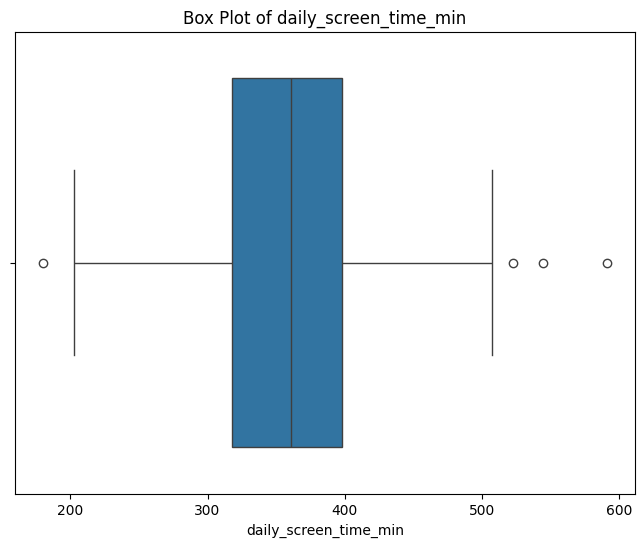

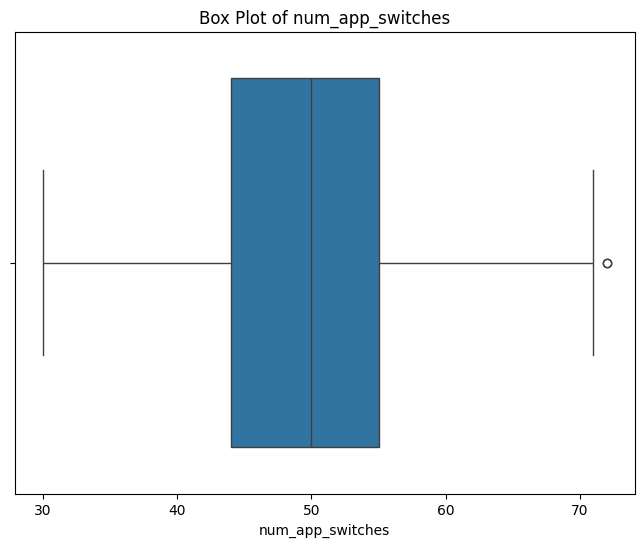

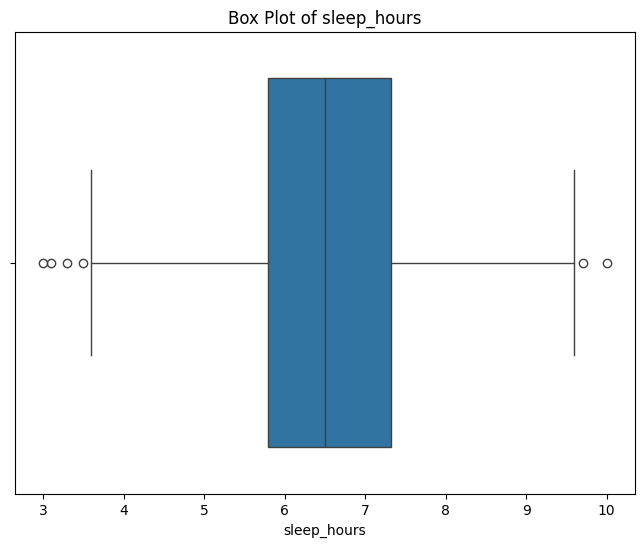

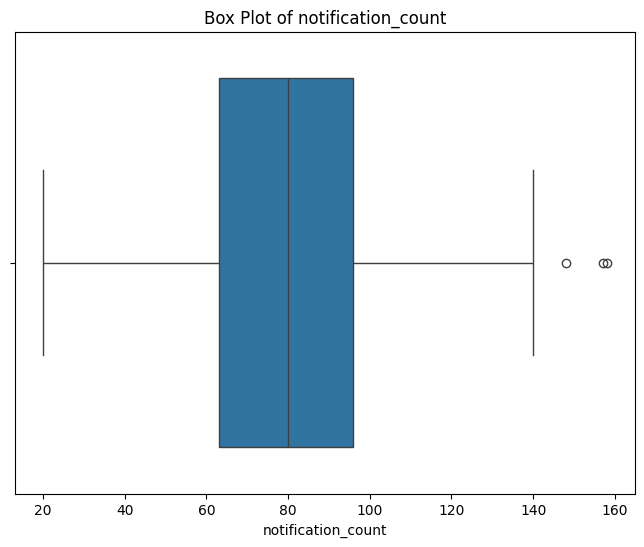

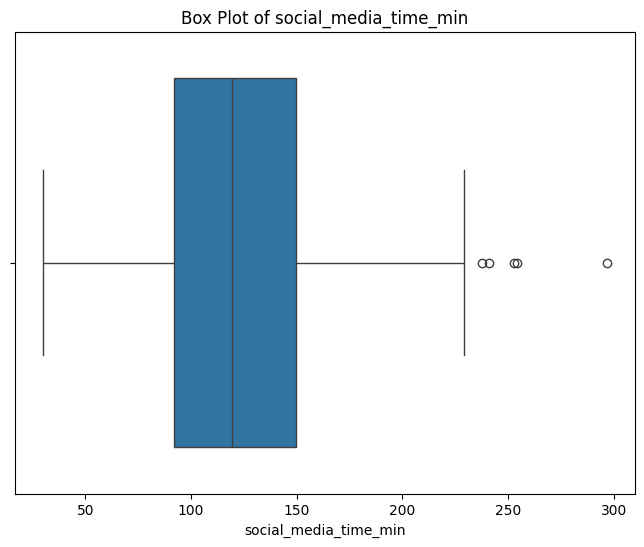

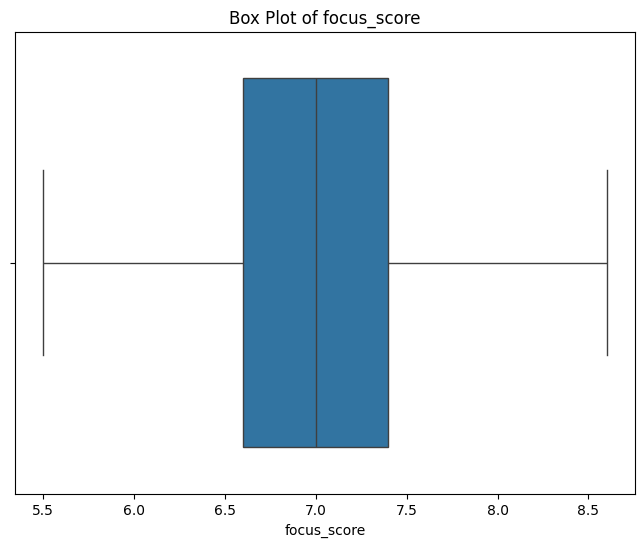

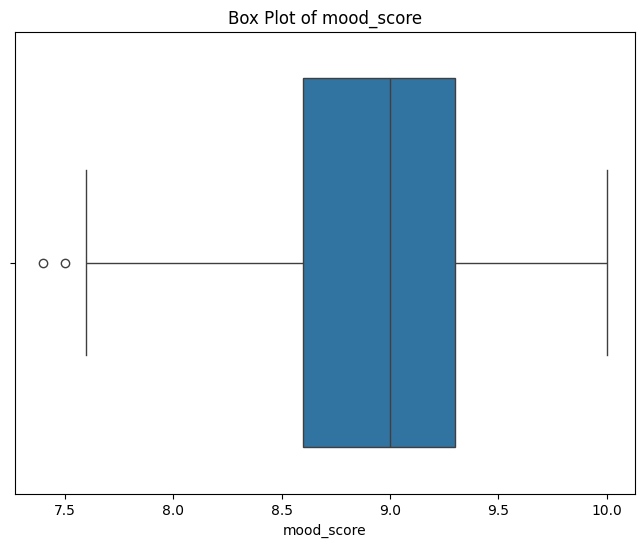

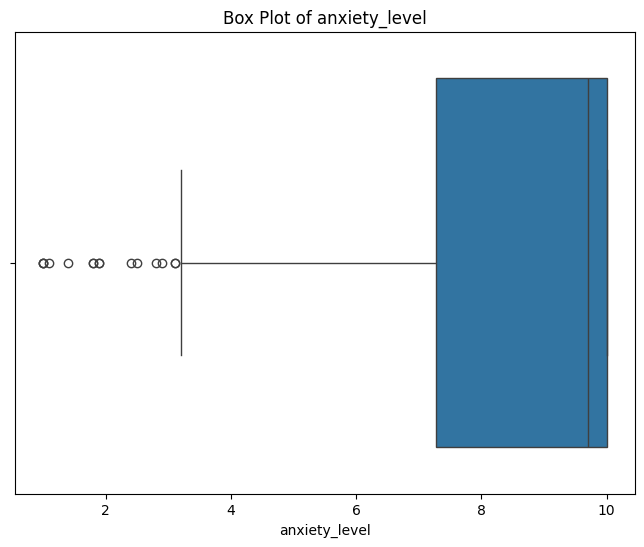

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
for col in X.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=X[col])
    plt.title(f'Box Plot of {col}')
    plt.show()


correlations

In [9]:
target_col = 'digital_wellbeing_score'
correlation_with_target = df.corr(numeric_only=True)[target_col].sort_values(ascending=False)
print("Correlation with digital_wellbeing_score:\n")
print(correlation_with_target)

Correlation with digital_wellbeing_score:

digital_wellbeing_score    1.000000
sleep_hours                0.440426
focus_score                0.411266
mood_score                 0.127360
num_app_switches          -0.080687
daily_screen_time_min     -0.087824
social_media_time_min     -0.262681
notification_count        -0.379679
anxiety_level             -0.836476
Name: digital_wellbeing_score, dtype: float64


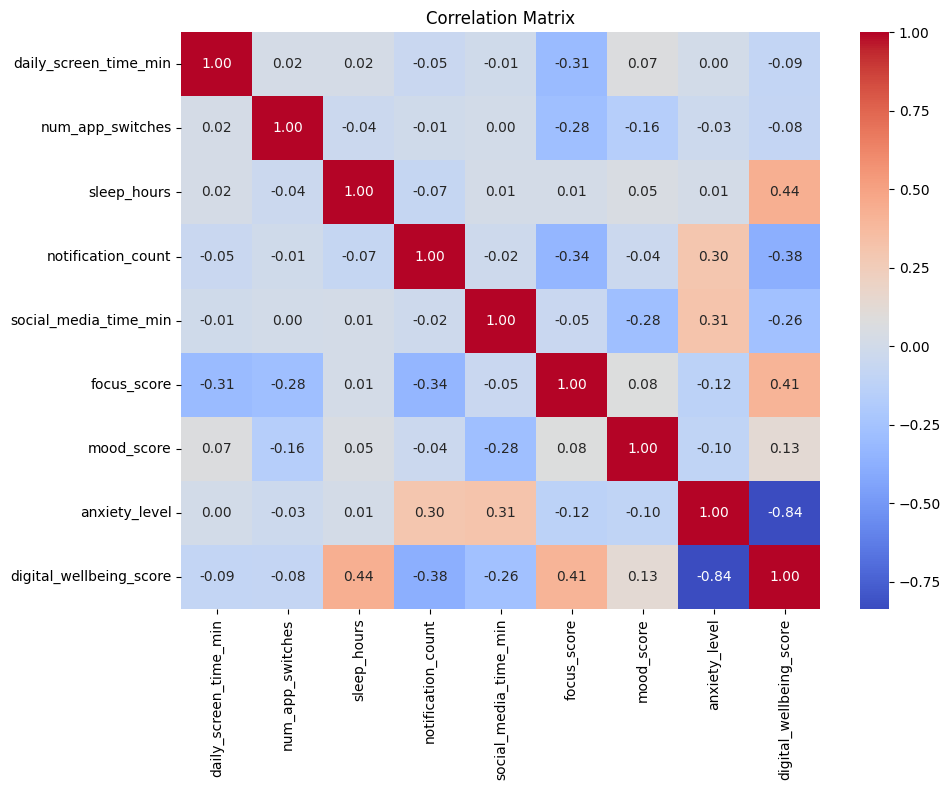

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


Pre processing

In [11]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model training

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"\n {model_name} Performance:")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")

#XGBoost Regressor
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
evaluate_model(y_test, y_pred_xgb, "XGBoost Regressor")

# Support Vector Regressor
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
evaluate_model(y_test, y_pred_svr, "Support Vector Regressor")

# K-Nearest Neighbors Regressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors Regressor")



 Linear Regression Performance:
Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.18
R² Score: 1.00

 Random Forest Regressor Performance:
Mean Squared Error (MSE): 2.00
Root Mean Squared Error (RMSE): 1.42
R² Score: 0.97

 XGBoost Regressor Performance:
Mean Squared Error (MSE): 2.24
Root Mean Squared Error (RMSE): 1.50
R² Score: 0.96

 Support Vector Regressor Performance:
Mean Squared Error (MSE): 48.45
Root Mean Squared Error (RMSE): 6.96
R² Score: 0.17

 K-Nearest Neighbors Regressor Performance:
Mean Squared Error (MSE): 45.26
Root Mean Squared Error (RMSE): 6.73
R² Score: 0.23


feature importance

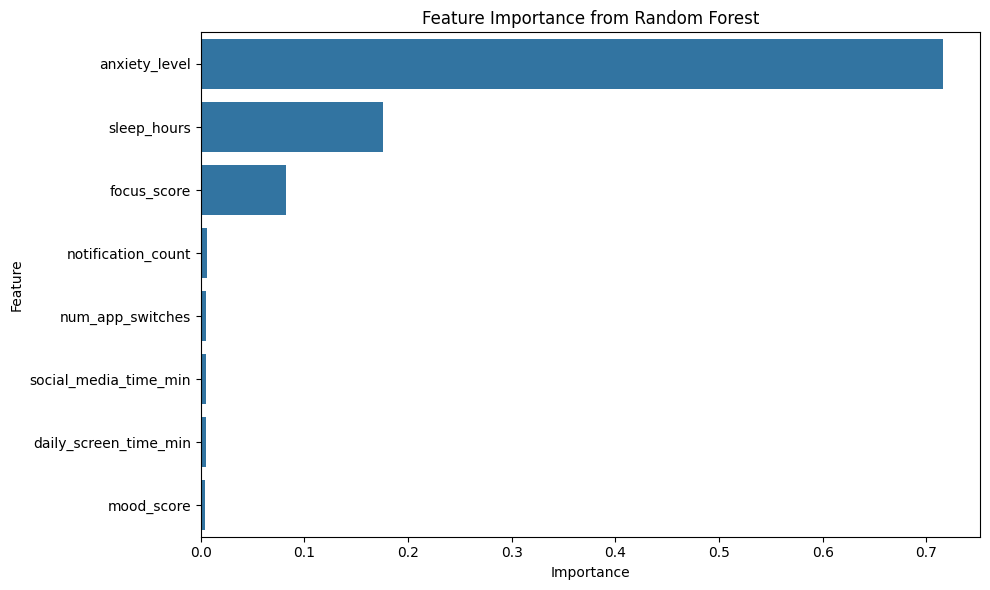

In [14]:
importances = rf.feature_importances_
feature_names = X.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [15]:
import pickle
filename = 'model.pkl'
pickle.dump(rf, open(filename, 'wb'))
